<a href="https://colab.research.google.com/github/CasCard/Machine-Learning-Project/blob/master/CNNMNIST_Digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model
import time as t

In [10]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


In [11]:
x_train=np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [12]:
K=len(set(y_train))
print("Number of classes:",K)

Number of classes: 10


In [0]:
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
A1=t.time()
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
A2=t.time()
print(A2-A1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1725 - accuracy: 0.9470 - val_loss: 0.0603 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0666 - accuracy: 0.9790 - val_loss: 0.0531 - val_accuracy: 0.9830
Epoch 3/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0472 - accuracy: 0.9848 - val_loss: 0.0460 - val_accuracy: 0.9870
Epoch 4/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0381 - accuracy: 0.9879 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 5/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.0345 - val_accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0250 - accuracy: 0.9920 - val_loss: 0.0334 - val_accuracy: 0.9892
Epoch 7/10
60000/60000 [==============================]

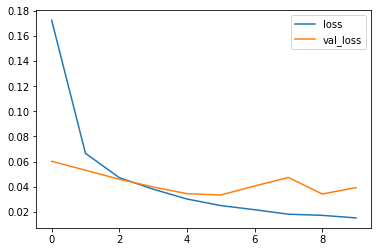

In [15]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

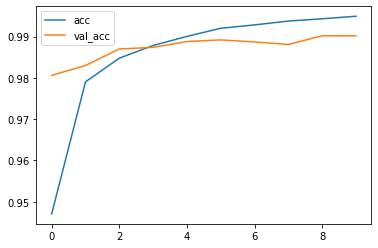

In [16]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [17]:
A3=t.time()
print(model.evaluate(x_test,y_test))
A4=t.time()
print(A4-A3)

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0393 - accuracy: 0.9902
[0.03928590429093388, 0.9902]
0.6683773994445801


In [18]:
predictions=model.predict([x_test])
print(np.argmax(predictions[1000]))

9
